In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit, KFold, StratifiedShuffleSplit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn import svm

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection  import RFE

import sklearn
print(sklearn.__version__)

1.3.1


### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = 'train_house_A.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test_house_A.csv' # содержит только имя файла, без имен папок

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [6]:
df_train = df_train.drop_duplicates()

In [7]:
# Блок(и) обучения и поверки модели

In [8]:
X_train = df_train.drop(['price'], axis = 1)
y_train = df_train.price
X_train, X_t, y_train, y_t = train_test_split(X_train, y_train, shuffle=True)

In [9]:
rfe_select = RFE(RandomForestRegressor(n_estimators = 500), step = 1, 
                 n_features_to_select = 20)
rfe_select.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(n_estimators=500), n_features_to_select=20)

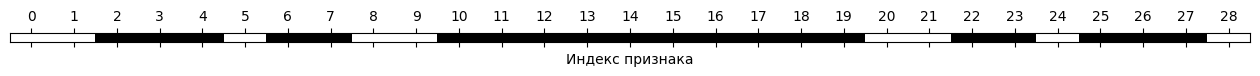

In [10]:
#Визуализируем отобранные признаки
mask = rfe_select.get_support()[:30]
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.2)
plt.yticks([])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

X_train_im = X_train[X_train.columns[mask]]
df_test_im = df_test[X_train.columns[mask]]
features_im = X_train.columns[mask]

In [11]:
#Вывод важных признаков
features_im

Index(['2', '3', '4', '6', '7', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '22', '23', '25', '26', '27'],
      dtype='object')

In [12]:
# Блок предсказания с использованием тестового набора

In [13]:
gb = GradientBoostingRegressor(learning_rate = 0.1)
gb.fit(X_train[list(features_im)], y_train)

GradientBoostingRegressor()

In [14]:
m = list(features_im)
df_test = df_test[m]

In [15]:
y_predict = gb.predict(df_test)

In [16]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict

array([5976520.56749987, 6335985.39802056, 3396493.68303685,
       4749721.70503784, 4312585.72253464, 4107272.21646561,
       7243447.64762433, 7135442.28920773, 3257601.15551968,
       7057563.54290586, 9137990.75423625, 3069366.0880395 ,
       4785113.69506652, 4296593.69796474, 3602631.06310768,
       6639859.58189109, 6113506.33032474, 6481098.64296317,
       4746936.48936929, 6438550.04947743, 3562722.90766217,
       3402500.01373081, 4977061.83906994, 4330451.31444765,
       6436141.95115847, 4342292.35347432, 5402478.50771885,
       3405819.89548323, 2918949.6713755 , 4740890.27917925,
       2852934.34098092, 7268525.05771133, 4663754.57079666,
       4796691.84315162, 5324120.46007622, 3255205.04228533,
       4402018.72434443, 3866465.38785044, 4553361.42803831,
       5445979.46853085, 6568857.4655709 , 5118354.0418202 ,
       9199904.46495268, 4610420.20422613, 3274274.01550533,
       6517660.44357575, 5081115.01375488, 2913927.42417145,
       4609524.32227391,

(137,) (137,)
Отрицательные цены -  0
Max Error: 6,079,751
 
----------------------
   MAPE Error: 21.98
----------------------


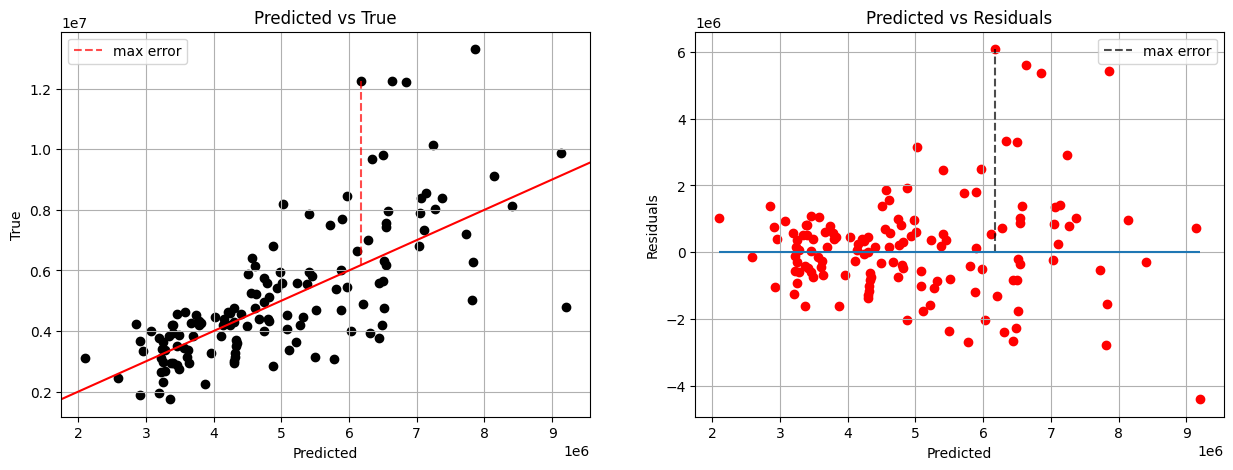

In [17]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_A.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [19]:
mask = features_im

import pickle
with open('saved_dictionary_a.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,1,1
1,16,airconditioning
2,6,area
3,4,area bathrooms
4,25,area bedrooms
5,10,area stories
6,5,basement
7,7,bathrooms
8,28,bathrooms stories
9,21,bedrooms
